In [ ]:
import ray
from ray import tune
import ray.rllib.agents.ppo as ppo
from ray.rllib.agents.ppo.appo import DEFAULT_CONFIG
from seagul.envs.mujoco.five_link import FiveLinkWalkerEnv
from pybullet_envs.gym_locomotion_envs import Walker2DBulletEnv
from ray.tune.registry import register_env
import pybullet_envs

def five_link_creator(env_config):
    return FiveLinkWalkerEnv()  # return an env instance


def bullet_walker_creator(env_config):
    return Walker2DBulletEnv()  # return an env instance

register_env("five_link-v3", five_link_creator)
register_env("Walker2DBulletEnv-v0", bullet_walker_creator)

In [ ]:
config = ppo.DEFAULT_CONFIG.copy()
config["num_gpus"] = 1
config["num_workers"] = 15
config["eager"] = False
config["model"]["fcnet_hiddens"] = [64,64]
config["lr"] = 5e-5
#config["env"] = "five_link-v3"
config["env"] = "Walker2DBulletEnv-v0"

config["kl_coeff"] = 1.0
config["num_sgd_iter"] = 20
config["lr"] = .0001
config["num_workers"] = 15
config["num_gpus"] = 0
config["batch_mode"] =  "complete_episodes"
config["observation_filter"] =  "MeanStdFilter"

config["sgd_minibatch_size"] = 2048
config["train_batch_size"] = 20480
       
ray.init()
analysis = tune.run(
    "PPO",
    config = config,
    stop={"timesteps_total": 32e6},
)

In [ ]:
config = ppo.DEFAULT_CONFIG.copy()
config["num_gpus"] = 1
config["num_workers"] = 15
config["eager"] = False
config["model"]["fcnet_hiddens"] = [64,64]
config["lr"] = 5e-5
#config["env"] = "five_link-v3"
config["env"] = "Walker2DBulletEnv-v0"

config["kl_coeff"] = 1.0
config["num_sgd_iter"] = 20
config["lr"] = .0001
config["num_workers"] = 15
config["num_gpus"] = 1
config["batch_mode"] =  complete_episodes
config["observation_filter"] =  MeanStdFilter

config["sgd_minibatch_size"] = 10240
config["train_batch_size"] = 81920
       
config['observation_filter'] = 'MeanStdFilter'
ray.init()
analysis = tune.run(
    "PPO",
    config = config,
    stop={"timesteps_total": 1e7},
)

ppo.PPOTrainer.with_updates(default_policy = None)

In [ ]:
import ray
from ray import tune
import ray.rllib.agents.ars as ars
import pybullet_envs


config = ars.DEFAULT_CONFIG.copy()
config["num_gpus"] = 0
config["num_workers"] = 8
config["eager"] = False
config["model"]["fcnet_hiddens"] = []
config["lr"] = 5e-5
config["env"] = "five_link-v3"
#config["env"] = "Walker2d-v3"
#config["env"] = "Walker2DBulletEnv-v0"

config['seed'] = tune.grid_search([1])

ray.init()
analysis = tune.run(
    "ARS",
    config = config,
    stop={"timesteps_total": 10e6},
)

In [ ]:
#trainer.load("/Users/sgillen/ray_results/ARS_five_link-v3_2019-10-21_14-02-55lwgccrp3/checkpoint_10/checkpoint-10") 
#trainer.restore("/Users/sgillen/ray_results/ARS_five_link-v3_2019-10-21_14-02-55lwgccrp3/checkpoint_10/checkpoint-10")
ray.shutdown()
ray.init()

def five_link_creator(env_config):
    return FiveLinkWalkerEnv()  # return an env instance


def bullet_walker_creator(env_config):
    return Walker2DBulletEnv()  # return an env instance

register_env("five_link-v3", five_link_creator)
register_env("Walker2DBulletEnv-v0", bullet_walker_creator)

env_name = "Walker2DBulletEnv-v0"

import json
expr_data = json.load(open('/home/sgillen/work/seagul/seagul/notebooks/ars/data/sanity2/PPO/experiment_state-2019-11-10_17-22-28.json'))
expr_data['checkpoints'][-1]['config']

trainer = ppo.PPOTrainer(config, env_name)

trainer.restore("/home/sgillen/work/seagul/seagul/notebooks/ars/data/sanity2/PPO/PPO_Walker2DBulletEnv-v0_0_2019-11-10_17-23-49afy9mht0/checkpoint_2/checkpoint-2")

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

env = gym.make(env_name)
obs = env.reset()

action_hist = []
state_hist  = []
reward_hist = []

done = False
while not done:
    actions = trainer.compute_action(obs.flatten())
    obs, reward, done, _ = env.step(np.asarray(actions))
    action_hist.append(np.copy(np.clip(actions, -10, 10)))
    state_hist.append(np.copy(obs))
    reward_hist.append(np.copy(reward))
    if done:
        break


print(sum(reward_hist))
plt.plot(action_hist)
plt.figure()
plt.plot(state_hist)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

d = pd.read_csv('/home/sgillen/ray_results/PPO/PPO_Walker2DBulletEnv-v0_0_2019-11-12_10-37-01c7nvmx7p/progress.csv')

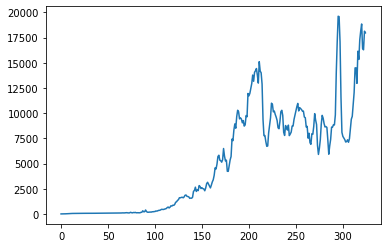

In [16]:
plt.plot(d['episode_reward_mean'])